### 1) Prepare rules for the all the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots 
 
## ANSWER:

In [1]:
## Import important library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# let's Display dataset
data_movie = pd.read_csv("Movies.csv")

# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [3]:
#Let's find the top five rows
data_movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
#Let's apply get_dummies
df = pd.get_dummies(data_movie)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Apriori Algorithm

In [5]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True,max_len=2)
apriori_frequent_itemsets

Wall time: 0 ns


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
121,0.4,"(V3_Sixth Sense, V2_Patriot)"
122,0.1,"(V4_Green Mile, V3_Gladiator)"
123,0.1,"(V3_Harry Potter1, V4_Green Mile)"
124,0.1,"(V3_Harry Potter1, V5_LOTR2)"


In [7]:
rules = association_rules(apriori_frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
197,(V4_Green Mile),(V3_Harry Potter1),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
198,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
199,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
200,(V4_Green Mile),(V5_LOTR2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
133,(LOTR),(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
124,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
135,(LOTR),(V3_Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
180,(V3_Gladiator),(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
181,(V2_LOTR),(V3_Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
142,(V3_Braveheart),(Braveheart),0.1,0.1,0.1,1.0,10.0,0.09,inf
143,(Braveheart),(V3_Braveheart),0.1,0.1,0.1,1.0,10.0,0.09,inf
184,(V3_Harry Potter1),(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
185,(V2_LOTR1),(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
167,(V2_LOTR2),(V1_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
197,(V4_Green Mile),(V3_Harry Potter1),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
198,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
199,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
200,(V4_Green Mile),(V5_LOTR2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    101
1     25
Name: itemsets, dtype: int64

## Fpgrowth

In [11]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

Wall time: 0 ns


,support,itemsets
0,0.6,(Sixth Sense)
1,0.2,(Green Mile)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.2,(LOTR2)


In [12]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    101
1     25
Name: itemsets, dtype: int64

## Analysis To The Results

In [13]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.2,(Green Mile),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.2,(LOTR2),1
...,...,...,...
121,0.1,"(V4_Green Mile, V3_Gladiator)",2
122,0.1,"(V1_Sixth Sense, V3_Gladiator)",2
123,0.1,"(V3_Gladiator, Green Mile)",2
124,0.1,"(V3_Gladiator, Sixth Sense)",2


##### Apply some basic analysis that can used to generate some intresting insights
##### Filter by columns based on numerical condition

In [14]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
                          & (fpgrowth_frequent_itemsets['support'] > 0.06)].head()

,support,itemsets,length
25,0.5,"(Gladiator, Sixth Sense)",2
26,0.2,"(Sixth Sense, Green Mile)",2
27,0.1,"(Gladiator, Green Mile)",2
28,0.1,"(LOTR1, Green Mile)",2
29,0.1,"(LOTR1, Sixth Sense)",2


In [15]:
# Let's Filtering by itemset length
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] != 1)]

,support,itemsets,length
25,0.5,"(Gladiator, Sixth Sense)",2
26,0.2,"(Sixth Sense, Green Mile)",2
27,0.1,"(Gladiator, Green Mile)",2
28,0.1,"(LOTR1, Green Mile)",2
29,0.1,"(LOTR1, Sixth Sense)",2
...,...,...,...
121,0.1,"(V4_Green Mile, V3_Gladiator)",2
122,0.1,"(V1_Sixth Sense, V3_Gladiator)",2
123,0.1,"(V3_Gladiator, Green Mile)",2
124,0.1,"(V3_Gladiator, Sixth Sense)",2


#### Generate insights by filtering values based on thier combnations and occurances in all dataset.

In [16]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Gladiator', 'Sixth Sense'}]

,support,itemsets,length
25,0.5,"(Gladiator, Sixth Sense)",2


In [17]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Sixth Sense' in str(x))]

,support,itemsets,length
0,0.6,(Sixth Sense),1
5,0.2,(V1_Sixth Sense),1
18,0.4,(V3_Sixth Sense),1
25,0.5,"(Gladiator, Sixth Sense)",2
26,0.2,"(Sixth Sense, Green Mile)",2
29,0.1,"(LOTR1, Sixth Sense)",2
32,0.1,"(Harry Potter1, Sixth Sense)",2
36,0.1,"(LOTR2, Sixth Sense)",2
37,0.2,"(V1_Sixth Sense, Green Mile)",2
38,0.2,"(V1_Sixth Sense, Sixth Sense)",2


#### We can observe more the relation between support and length using correlation and hexbin plot. 

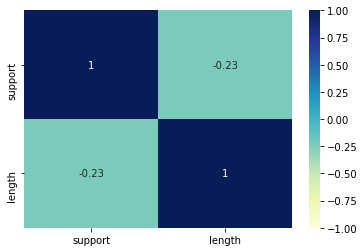

In [18]:
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');


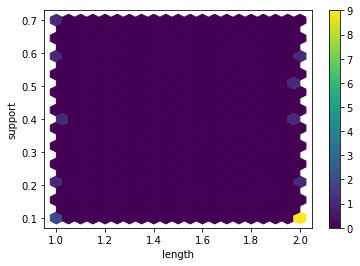

In [19]:
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

### Scatterplot

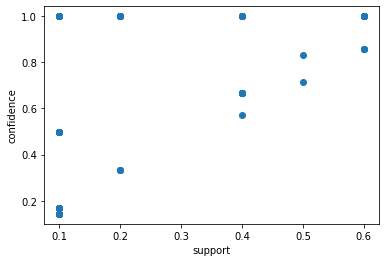

In [20]:
import matplotlib.pyplot as plt
x=rules[("support")]
y=rules[("confidence")]
plt.xlabel("support")
plt.ylabel("confidence")
plt.scatter(x,y)
plt.show()

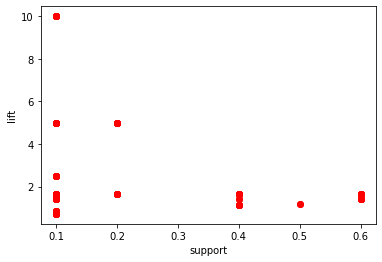

In [21]:
import matplotlib.pyplot as plt
x=rules[("support")]
y=rules[("lift")]
plt.xlabel("support")
plt.ylabel("lift")
plt.scatter(x,y, c = "Red")
plt.show()